# Drill: Present the same data multiple ways

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

data = pd.read_csv('countries of the world.csv', decimal=',')
df = pd.DataFrame(data).dropna()
print(df.nunique())
print(df.Birthrate.max())

Country                               179
Region                                 11
Population                            179
Area (sq. mi.)                        179
Pop. Density (per sq. mi.)            172
Coastline (coast/area ratio)          121
Net migration                         127
Infant mortality (per 1000 births)    176
GDP ($ per capita)                    114
Literacy (%)                          130
Phones (per 1000)                     173
Arable (%)                            170
Crops (%)                             139
Other (%)                             174
Climate                                 6
Birthrate                             177
Deathrate                             165
Agriculture                           136
Industry                              135
Service                               146
dtype: int64
50.73


## #1 Plot 1 variable 4 different ways

### Variable = Phones (per 1000)
#### Plot 1

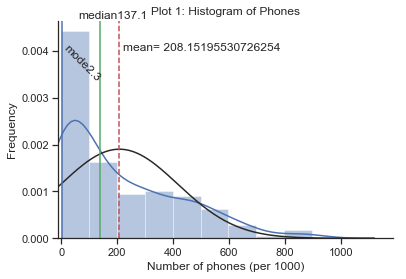

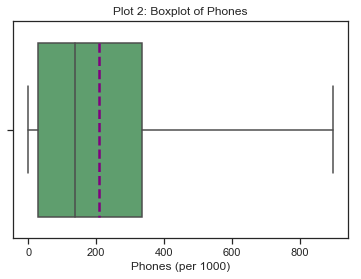

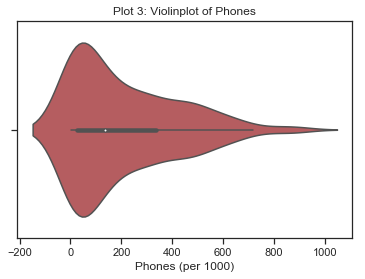

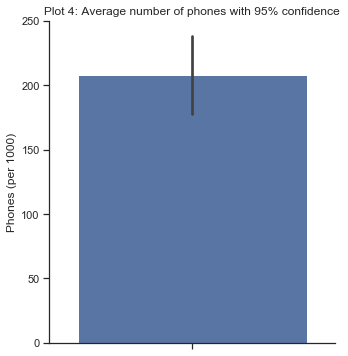

In [160]:
# histogram of phones
from scipy.stats import norm

sns.set(style='ticks')
phones = df['Phones (per 1000)']

#plt.hist(phones, linewidth = 0)
sns.distplot(phones, fit=norm)

mean=df['Phones (per 1000)'].mean()
median=df['Phones (per 1000)'].median()
mode=df['Phones (per 1000)'].mode().get_values()[0]

plt.axvline(mean, color='r', linestyle='--')
plt.text(220, .004, 'mean= '+str(mean))
plt.axvline(median, color='g', linestyle='-')
plt.text(60, .0047, 'median'+str(median))
plt.axvline(mode, color='b', linestyle='-')
plt.text(3, .004, 'mode'+str(mode), rotation=-45)

plt.title('Plot 1: Histogram of Phones')
plt.xlabel('Number of phones (per 1000)')
plt.ylabel('Frequency')
plt.xlim(-10)
sns.despine(top=True, right=True)
plt.show()

# boxplot of phones
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
sns.boxplot(x='Phones (per 1000)', data=df, whis='range', color='g', meanprops=meanlineprops, showmeans=True, meanline=True)
plt.title('Plot 2: Boxplot of Phones')
plt.show()

# violinplot of phones
sns.violinplot(x='Phones (per 1000)', data=df, inner='box', color='r')
plt.title('Plot 3: Violinplot of Phones')
plt.show()

# barplot for average phones
sns.catplot(y='Phones (per 1000)', data=df, kind='bar')
plt.title('Plot 4: Average number of phones with 95% confidence')
plt.show()

Plot 1, the histogram, shows the distribution of phones has a right (positive) skewness.  The mean is to the right of the median.  The pros of this plot are that it is easy to see the mean, median, and mode, allowing us to determine the skewness easiliy.  We also get the probability density function (the blue line) for the distribution, which tells us the probability of a random sample (number of phones) falling between a specified range.  The cons of this plot are that we don't get any quartile information other than median and we don't have any error bars calculated for the mean estimate.

Plot 2, the boxplot, also shows a right skewness, which is evidenced by the mean falling to the right of the median value.  The pros, here, are that we can determine the min and max values from the whiskers and all of the quartile information from the box.  We do not have any information about the mode with this plot, nor do we have any sense of the frequency of where the data lies (a.k.a. density plot).

Plot 3, the violinplot, tells us the same quartile information from the thick line in the violin, with the white dot signaling the median.  The thin line represents the 95% CI for the median in this case, which is something we did not have in the previous plot.  We also see the density distribution in the shape of the violin as well.  This plot does not show any info about the mode or the mean.  We can see that this has the same right skewness but can only conclude this visually.

Plot 4, the bar plot, shows us the average number of phones with a 95% confidence interval shown as the black bar.  This plot is only good for showing the average, and does not provide any other information about the median, mode, or distribution.

## #2 Plot 2 continuous variables and plot them 3 ways

### Continuous var1 = Birthrate
### Continuous var2 = Deathrate
#### Plot 1


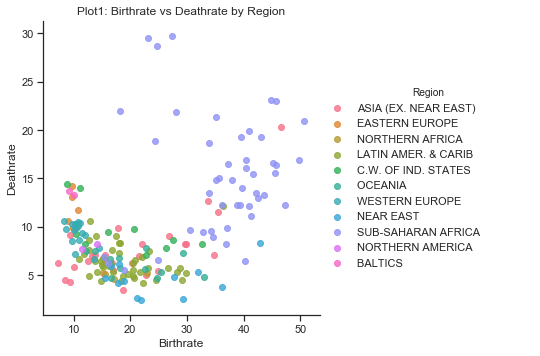

In [164]:
# scatter plots function

def scatterplot(x='Literacy (%)', y='Phones (per 1000)', hue='Region'):
        sns.lmplot(x=x, y=y, hue=hue, data=df, fit_reg=False)
        plt.title('Plot1: '+str(x)+' vs '+str(y)+' by '+str(hue))
        plt.show()
#scatterplot('Deathrate')
#scatterplot('Birthrate')
#scatterplot()
scatterplot('Birthrate', 'Deathrate')
#scatterplot('GDP ($ per capita)', 'Population')
#scatterplot('Arable (%)', 'Crops (%)')
#scatterplot('Region', 'Population', None)

Plot 1 shows the birthrate vs deathrate colored by region.  We can see somewhat of an increasing trend indicating that as the birthrate increases the deathrate also increases.  The cons with this plot are that we only have visual information and no calculation to accompany our hypothesis that birthrate and deathrate are positively correlated.

[[1.         0.44622018]
 [0.44622018 1.        ]]


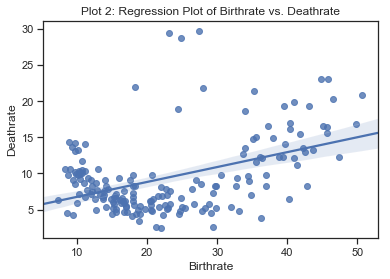

In [182]:
# regression plot (same as above)
x = df.Birthrate
y = df.Deathrate
cor = np.corrcoef(x,y)
print(cor)

sns.regplot(x, y, data=df, ci=95)
plt.title('Plot 2: Regression Plot of Birthrate vs. Deathrate')
plt.show()
# not sure why this below is not working....
#sns.lmplot(x=x, y=y, data=df)
#plt.show()

Plot 2 shows the same data as above in plot 1 with a regression line fit through the data.  The blue shading around the regression line shows the 95% confidence for the regression line.  With the regression line we can confirm our hypothesis from plot 1 that there is a positive correlation between the two variables, but it can be seen from the matrix above that the correlation is not very strong.

#### Plot 3

c:\users\cmiller\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


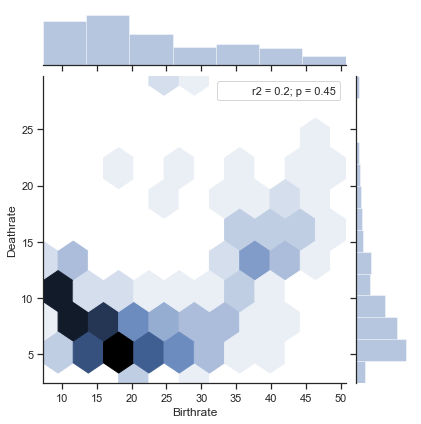

In [188]:
# jointplot showing distribution and scatter

def r2(x, y):
    return stats.pearsonr(x, y)[0]**2, np.corrcoef(x,y)[1,0]

sns.jointplot(x, y, data=df, kind='hex', stat_func=r2)
plt.show()

Plot 3 shows us the same scatterplot information again with the points represented by hexagonal shapes where the darker color indicates a higher frequency.  The plot also has the histogram for each variable show across from the variable name to accompany the hex plot, allowing us to see the distribution of each variable individually.  The r^2 and correlation value are displayed for this plot, indicating that there is some positive correlation.

## #3 Plot 1 continuous and 1 categorical variable 6 different ways

### Continuous Var = Phones (per 1000) <br> Categorical Var = Region
#### Plot 1

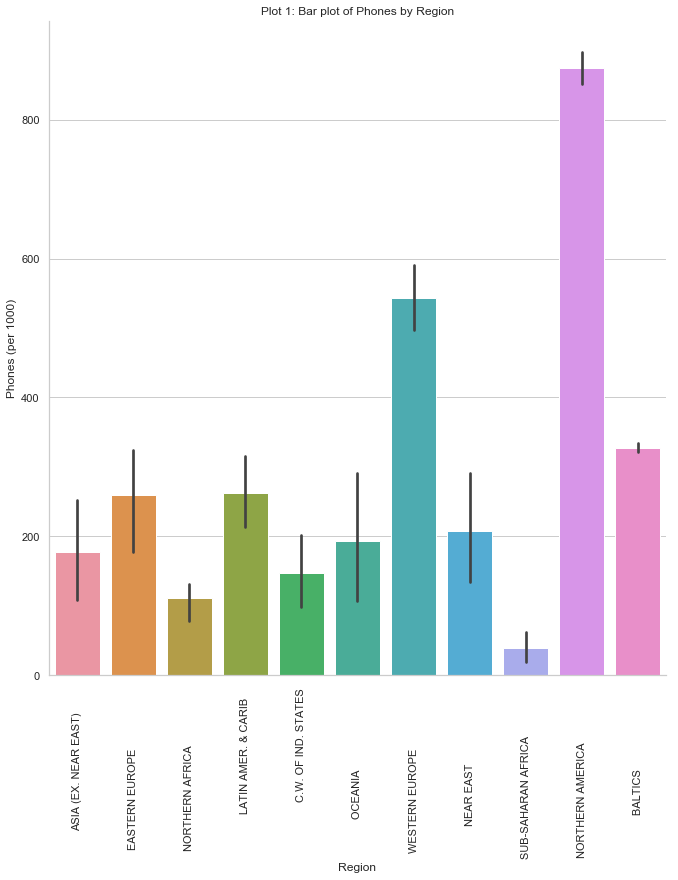

In [159]:
# bar plot of phones by region
sns.set(style='whitegrid')
sns.catplot(x='Region', y='Phones (per 1000)', height=10, data=df, kind='bar', ci=95)
plt.title('Plot 1: Bar plot of Phones by Region')
plt.xticks(rotation=90)
plt.show()

Plot 1 shows the average number of phones (per 1000) by region with the black line representing the 95% confidence interval.  This plot is nice for displaying averages with CI but does not show any info about distribution or other central tendencies.

#### Plot 2

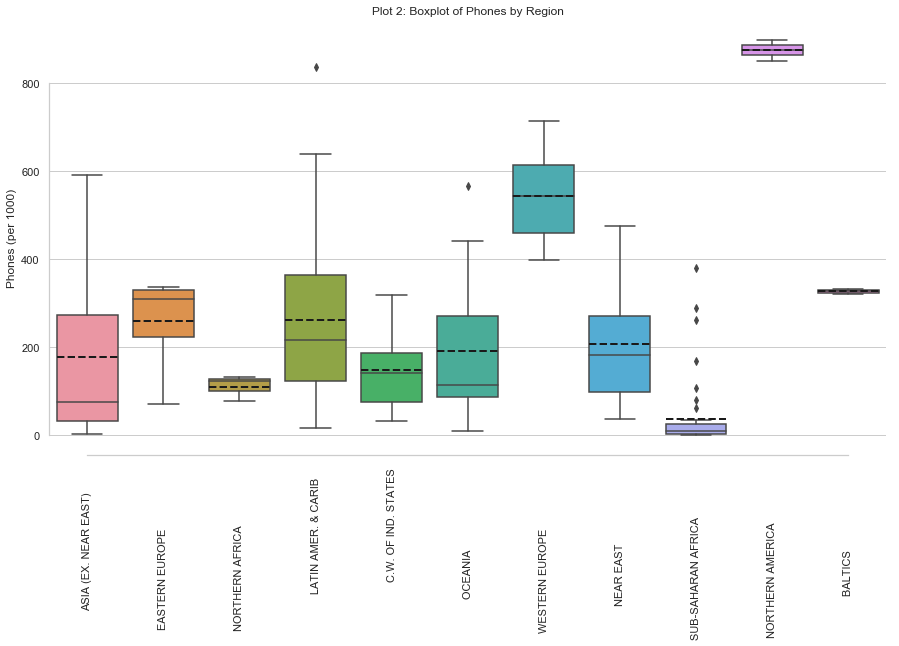

In [95]:
# boxplots of phones by region
plt.figure(figsize=(15,8))
mlp = dict(linewidth=2, color='k')
sns.boxplot(x='Region', y='Phones (per 1000)', data=df, showmeans=True, meanline=True, meanprops=mlp)
plt.xticks(rotation=90) 
# how can I move the labels next to the plot?
plt.title('Plot 2: Boxplot of Phones by Region')
sns.despine(trim=True)
plt.xlabel('')
plt.show()

Plot 2 shows boxplots for the number of phones by region.  The boxplots clearly show the means and quartile information for each region.  With the plots sharing the same y-axis we can clearly see how the means and quartiles compare across each region.  The boxplot this time shows the outliers instead of the full range of data.  The outliers are determined by values that fall outside of Q1-(IQR x 1.5) and Q3+(IQR x 1.5).  The skewness for each region can be determined from these plots; whereas, this plot does not show us any info about modes or the density of the distribution.

#### Plot 3

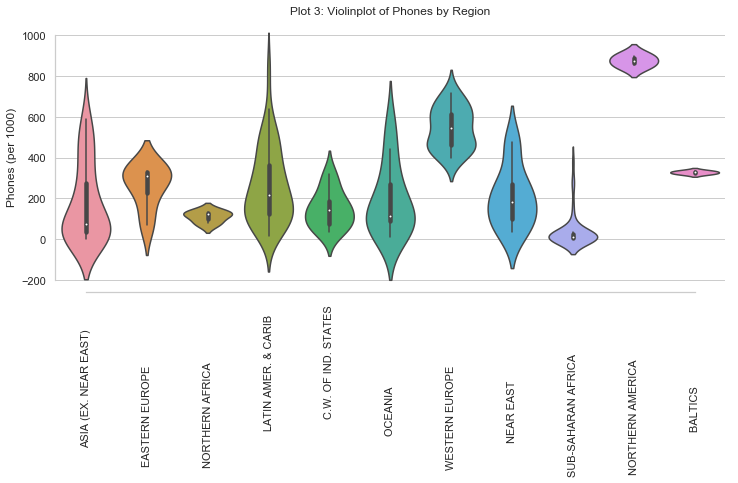

In [89]:
# violinplot of phones by region
plt.figure(figsize=(12,5))
sns.violinplot(x='Region', y='Phones (per 1000)', data=df, scale='width')
plt.xticks(rotation=90) 
plt.title('Plot 3: Violinplot of Phones by Region')
sns.despine(trim=True)
plt.xlabel('')
plt.show()

Plot 3 shows us the same quartile info as the boxplots above, but this time includes density distribution information.  Although, we can visually determine the skewness from the plots we do not have information about the mean or the mode in these plots.  We do have the 95% confidence interval for each median represented by the thin black line in the center.

#### Plot 4

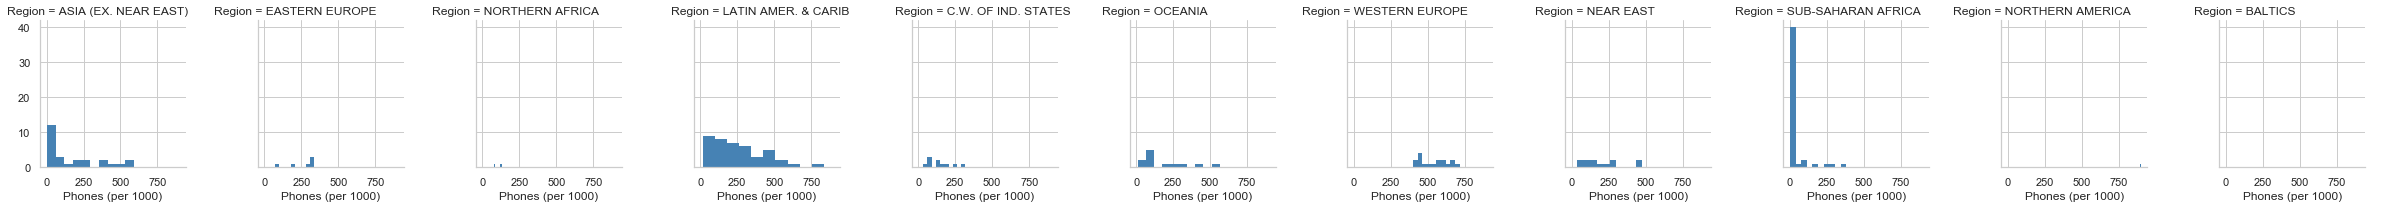

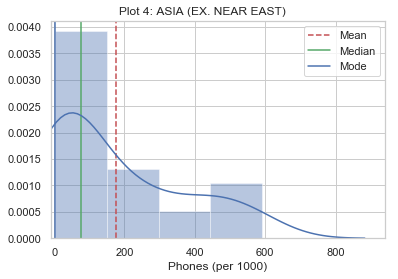

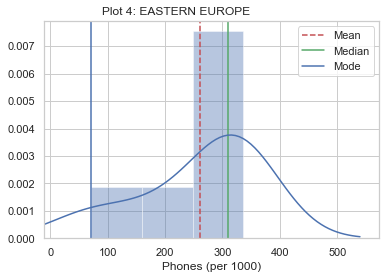

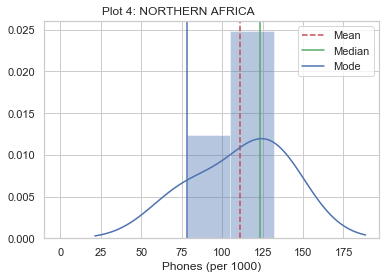

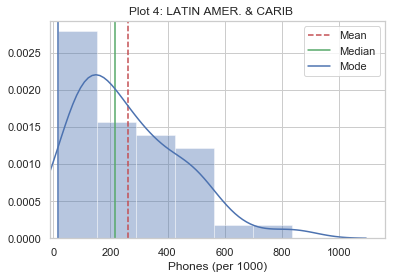

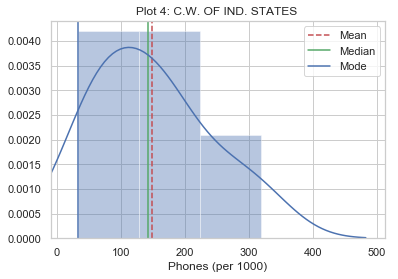

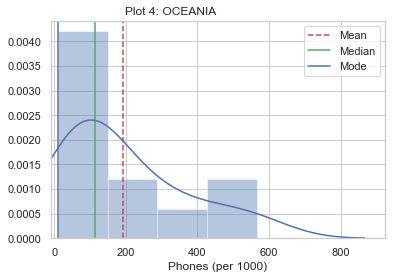

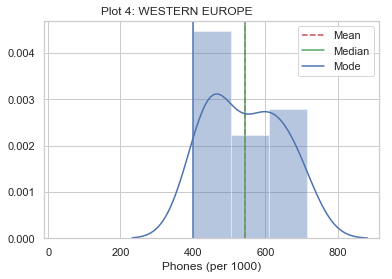

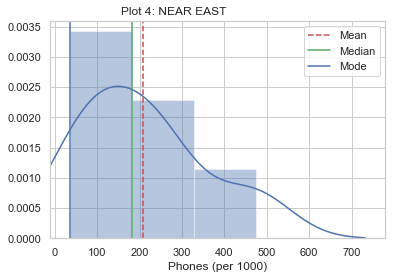

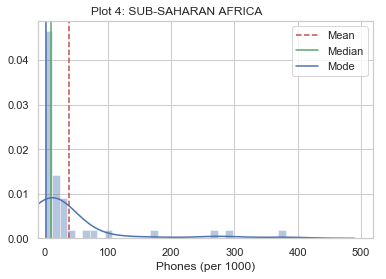

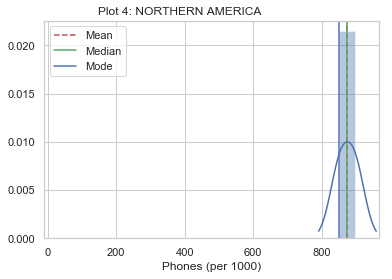

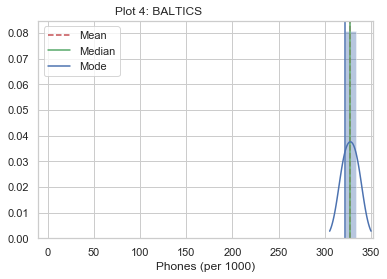

In [126]:
# Histograms: distribution of phones for each region

a = sns.FacetGrid(df, col='Region')
a.map(plt.hist, "Phones (per 1000)", color="steelblue",  lw=0)
plt.show()

for reg in df.Region.unique():
    mean=df['Phones (per 1000)'][df['Region']==reg].mean()
    median=df['Phones (per 1000)'][df['Region']==reg].median()
    mode=df['Phones (per 1000)'][df['Region']==reg].mode().get_values()[0]

    mean_line = plt.axvline(mean, color='r', linestyle='--', label='Mean')
    median_line = plt.axvline(median, color='g', linestyle='-', label='Median')
    mode_line = plt.axvline(mode, color='b', linestyle='-', label='Mode')
    
    sns.distplot(df['Phones (per 1000)'][df['Region']==reg])
    plt.xlim(-10)
    plt.title('Plot 4: ' + str(reg))
    plt.legend(handles=[mean_line, median_line, mode_line])
    plt.show()

Plot 4 shows us the distribution for phones by each region with the mean, median, and mode displayed for each.  The pdf for each distribution is also shown by the blue line.  This gives us a clear way for determining the skewness as well as finding the probability a number of phones will fall within a certain range.  We do not have info about the mode or any error information for the median or mean.

#### Plot 5

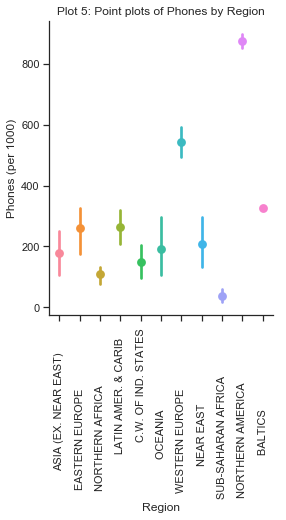

In [161]:
# point plots for phones by region
sns.catplot(x='Region', y='Phones (per 1000)', hue='Region', data=df, kind='point')
plt.xticks(rotation=90)
plt.title('Plot 5: Point plots of Phones by Region')
plt.show()

Plot 5 shows the same information as plot 1 but in a more compact method.  It shows the average number of phones by region with a 95% confidence interval.  It does not have any other information.

#### Plot 6

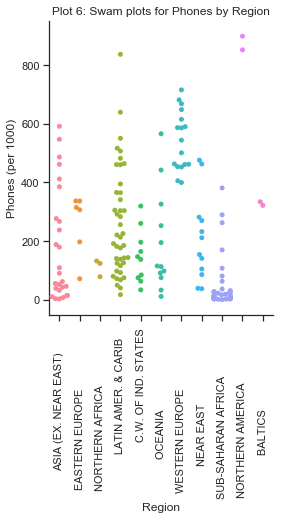

In [162]:
# swarm plots for phones by region

sns.catplot(x="Region", y="Phones (per 1000)", kind="swarm", data=df)
plt.xticks(rotation=90)
plt.title('Plot 6: Swam plots for Phones by Region')
plt.show()
#sns.catplot(x="Region", y="Phones (per 1000)", jitter=False, data=df)
#plt.xticks(rotation=90)
#plt.show()

Plot 6 shows swarm plots for the number of phones by region.  The dots represent the range and show the frequency (density) for each distribution as well.  We do not get any information about the mean, median, or mode from this plot but can see skewness visually for some (i.e. ASIA and SUB-SAHARAN AFRICA).